In [48]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

#read csv dataset
train = pd.read_csv('file:////Usr/local/Cellar/apache-spark/2.4.4/5003/5012/feature_hero_dcdd_riva_teama.csv')

train_x = train.drop(['1 - DUO_CARRY','1 - DUO_SUPPORT','1 - JUNGLE','1 - MID','1 - TOP',\
                      '2 - DUO_CARRY','2 - DUO_SUPPORT','2 - JUNGLE','2 - MID','2 - TOP',\
                      'carry_vs','support_vs','jungle_vs','mid_vs','top_vs',\
                      'teammates_jungle_mid','teammates_carry_sup','T1 win'],axis=1)

'''# Looking for nulls
print('null:',train_x[train_x.isnull().values==True])
print(list(train_x.columns))
for col in list(train_x.columns):
    train_x[col] = train_x[col].fillna(train_x[col].mean())

# Inspecting type
print(train_x.dtypes)

print('null:',train_x.isnull().any())
'''

train_y = train[['T1 win']]
del train
print('train_x shape:',train_x.shape)
print('train_y shape:',train_y.shape)

train_x shape: (148634, 76)
train_y shape: (148634, 1)


In [49]:
from sklearn.model_selection import train_test_split, GridSearchCV

#split train and test data
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.3, random_state=0)

In [50]:
from lightgbm import LGBMClassifier

#Defining Light GBM Classifier model to be finetuned
model_lgb = LGBMClassifier(boosting_type='gbdt', objective='binary', silent=True)

#Defining the list parameters
param_dist = {"learning_rate" : [0.05],
              "num_leaves": [3,7,10,12,13],
              "min_child_weight": [0.01],
              "min_child_samples":[15] ,
              "num_iterations": [100]
             }

#Performing finetuing
grid_search = GridSearchCV(model_lgb, n_jobs=-1, param_grid=param_dist, cv = 3, scoring="roc_auc", verbose = 3)
grid_search.fit(X_train,y_train)
grid_search.best_estimator_

#The process of finetuning
#       learning_rate            num_leaves       min_child_weight     min_child_samples
#1st [0.01,0.05,0.1]->0.01,  [100,300,600]->100
#2nd [0.01,0.05,0.1]->0.05,  [31,50,100]->31,     [0.01,0.1,1]->0.01,    [10,20,30]->20
#3rd [0.05,0.1]->0.05,       [20,31,40]->20,      [0.01,0.03,0.05]->0.01 [15,20,25]->15
#4th                         [10,15,20]->10                              [10,15]->15
#5th                         [3,7,10,12,13]->12





Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:    8.8s remaining:   13.3s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:   14.6s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   15.1s finished
/Users/liuxueling/anaconda2/envs/python35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/liuxueling/anaconda2/envs/python35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/liuxueling/anaconda2/envs/python35/lib/python3.5/site-packages/lightgbm/engine.py:148: UserWar

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.05, max_depth=-1,
        min_child_samples=15, min_child_weight=0.01, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_iterations=100, num_leaves=12,
        objective='binary', random_state=None, reg_alpha=0.0,
        reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

In [51]:
from xgboost import XGBClassifier

#Defining XG Boost Classifier model to be finetuned
model_xgb = XGBClassifier()
param_dist = {"max_depth": [3,4],
              "learning_rate" : [0.07],
              "min_child_weight": [10],
              "num_iterations": [100]
             }

#Performing finetuing
grid_search = GridSearchCV(model_xgb, n_jobs=-1, param_grid=param_dist, cv = 3, scoring="roc_auc", verbose = 3)
grid_search.fit(X_train,y_train)
grid_search.best_estimator_

#The process of finetuning parameters
#       max_depth         learning_rate          min_child_weight
#1st [10,30,50]->10,   [0.01,0.05,0.1]->0.05,      [1,3,6]->6
#2nd [5,10,15]->5,     [0.07,0.1,0.16]->0.07,      [6,10,15]->10
#3rn [3,4]->3



Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   36.8s remaining:   36.8s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   42.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   42.0s finished
/Users/liuxueling/anaconda2/envs/python35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/liuxueling/anaconda2/envs/python35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.07,
       max_delta_step=0, max_depth=3, min_child_weight=10, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, num_iterations=100,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [52]:
from catboost import CatBoostClassifier

#Defining Cat Boost Classifier model to be finetuned
model_cb = CatBoostClassifier()
param_dist = {"depth": [1,5,10],
              "learning_rate" : [0.01,0.05,0.1],
              "l2_leaf_reg": [1,5,10],
              "iterations": [100]
             }

#Performing finetuing
grid_search = GridSearchCV(model_cb, n_jobs=-1, param_grid=param_dist, cv = 3, scoring="roc_auc", verbose = 3)
grid_search.fit(X_train,y_train)
grid_search.best_estimator_

#The process of finetuning parameters
#       depth         learning_rate         l2_leaf_reg
#1st [1,5,10]->10,  [0.01,0.05,0.1]->0.1,   [1,5,10]->10

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  5.0min finished


0:	learn: 0.6922123	total: 21.5ms	remaining: 2.13s
1:	learn: 0.6914626	total: 41.2ms	remaining: 2.02s
2:	learn: 0.6906217	total: 58ms	remaining: 1.87s
3:	learn: 0.6899403	total: 77.1ms	remaining: 1.85s
4:	learn: 0.6892425	total: 94.4ms	remaining: 1.79s
5:	learn: 0.6886692	total: 113ms	remaining: 1.77s
6:	learn: 0.6882170	total: 133ms	remaining: 1.77s
7:	learn: 0.6878542	total: 151ms	remaining: 1.73s
8:	learn: 0.6874880	total: 166ms	remaining: 1.68s
9:	learn: 0.6871379	total: 185ms	remaining: 1.66s
10:	learn: 0.6868807	total: 203ms	remaining: 1.64s
11:	learn: 0.6865178	total: 220ms	remaining: 1.61s
12:	learn: 0.6862145	total: 254ms	remaining: 1.7s
13:	learn: 0.6859668	total: 276ms	remaining: 1.69s
14:	learn: 0.6857700	total: 296ms	remaining: 1.68s
15:	learn: 0.6855454	total: 313ms	remaining: 1.64s
16:	learn: 0.6853822	total: 331ms	remaining: 1.61s
17:	learn: 0.6851572	total: 348ms	remaining: 1.58s
18:	learn: 0.6849608	total: 372ms	remaining: 1.59s
19:	learn: 0.6847914	total: 395ms	remai

In [53]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

#Defining models with finetuned parameters
model_xgb = XGBClassifier(max_depth = 3, learning_rate = 0.07, min_child_weight = 10)
model_lgb = LGBMClassifier(learning_rate = 0.05, num_leaves = 12, min_child_samples = 15)
# model_cb = CatBoostClassifier(eval_metric = "AUC",depth = 10, learning_rate = 0.1, l2_leaf_reg = 10,iterations = 500)
model_cb = CatBoostClassifier(eval_metric = "AUC")

print(model_xgb)
print(model_lgb)
print(model_cb)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.07,
       max_delta_step=0, max_depth=3, min_child_weight=10, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.05, max_depth=-1,
        min_child_samples=15, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=12, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [54]:
#fitting the model
model_xgb.fit(X_train,y_train)

/Users/liuxueling/anaconda2/envs/python35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/liuxueling/anaconda2/envs/python35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.07,
       max_delta_step=0, max_depth=3, min_child_weight=10, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [55]:
model_lgb.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.05, max_depth=-1,
        min_child_samples=15, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=12, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [56]:
model_cb.fit(X_train,y_train)

Learning rate set to 0.062373
0:	total: 22.7ms	remaining: 22.6s
1:	total: 41.9ms	remaining: 20.9s
2:	total: 57.8ms	remaining: 19.2s
3:	total: 77.5ms	remaining: 19.3s
4:	total: 95.2ms	remaining: 18.9s
5:	total: 113ms	remaining: 18.8s
6:	total: 131ms	remaining: 18.6s
7:	total: 148ms	remaining: 18.3s
8:	total: 167ms	remaining: 18.4s
9:	total: 184ms	remaining: 18.2s
10:	total: 207ms	remaining: 18.6s
11:	total: 230ms	remaining: 18.9s
12:	total: 250ms	remaining: 19s
13:	total: 267ms	remaining: 18.8s
14:	total: 286ms	remaining: 18.8s
15:	total: 304ms	remaining: 18.7s
16:	total: 322ms	remaining: 18.6s
17:	total: 339ms	remaining: 18.5s
18:	total: 357ms	remaining: 18.5s
19:	total: 378ms	remaining: 18.5s
20:	total: 396ms	remaining: 18.5s
21:	total: 421ms	remaining: 18.7s
22:	total: 440ms	remaining: 18.7s
23:	total: 458ms	remaining: 18.6s
24:	total: 474ms	remaining: 18.5s
25:	total: 491ms	remaining: 18.4s
26:	total: 510ms	remaining: 18.4s
27:	total: 526ms	remaining: 18.3s
28:	total: 544ms	remainin

245:	total: 4.92s	remaining: 15.1s
246:	total: 4.95s	remaining: 15.1s
247:	total: 4.97s	remaining: 15.1s
248:	total: 4.99s	remaining: 15.1s
249:	total: 5.02s	remaining: 15.1s
250:	total: 5.05s	remaining: 15.1s
251:	total: 5.07s	remaining: 15s
252:	total: 5.09s	remaining: 15s
253:	total: 5.11s	remaining: 15s
254:	total: 5.14s	remaining: 15s
255:	total: 5.16s	remaining: 15s
256:	total: 5.19s	remaining: 15s
257:	total: 5.21s	remaining: 15s
258:	total: 5.23s	remaining: 15s
259:	total: 5.25s	remaining: 14.9s
260:	total: 5.27s	remaining: 14.9s
261:	total: 5.29s	remaining: 14.9s
262:	total: 5.31s	remaining: 14.9s
263:	total: 5.33s	remaining: 14.9s
264:	total: 5.36s	remaining: 14.9s
265:	total: 5.38s	remaining: 14.9s
266:	total: 5.4s	remaining: 14.8s
267:	total: 5.42s	remaining: 14.8s
268:	total: 5.44s	remaining: 14.8s
269:	total: 5.46s	remaining: 14.8s
270:	total: 5.49s	remaining: 14.8s
271:	total: 5.51s	remaining: 14.7s
272:	total: 5.53s	remaining: 14.7s
273:	total: 5.55s	remaining: 14.7s
27

489:	total: 10.3s	remaining: 10.7s
490:	total: 10.3s	remaining: 10.7s
491:	total: 10.3s	remaining: 10.7s
492:	total: 10.4s	remaining: 10.7s
493:	total: 10.4s	remaining: 10.6s
494:	total: 10.4s	remaining: 10.6s
495:	total: 10.4s	remaining: 10.6s
496:	total: 10.5s	remaining: 10.6s
497:	total: 10.5s	remaining: 10.6s
498:	total: 10.5s	remaining: 10.5s
499:	total: 10.5s	remaining: 10.5s
500:	total: 10.5s	remaining: 10.5s
501:	total: 10.6s	remaining: 10.5s
502:	total: 10.6s	remaining: 10.4s
503:	total: 10.6s	remaining: 10.4s
504:	total: 10.6s	remaining: 10.4s
505:	total: 10.6s	remaining: 10.4s
506:	total: 10.7s	remaining: 10.4s
507:	total: 10.7s	remaining: 10.3s
508:	total: 10.7s	remaining: 10.3s
509:	total: 10.7s	remaining: 10.3s
510:	total: 10.7s	remaining: 10.3s
511:	total: 10.8s	remaining: 10.2s
512:	total: 10.8s	remaining: 10.2s
513:	total: 10.8s	remaining: 10.2s
514:	total: 10.8s	remaining: 10.2s
515:	total: 10.8s	remaining: 10.2s
516:	total: 10.9s	remaining: 10.1s
517:	total: 10.9s	re

730:	total: 15.4s	remaining: 5.66s
731:	total: 15.4s	remaining: 5.64s
732:	total: 15.4s	remaining: 5.62s
733:	total: 15.4s	remaining: 5.59s
734:	total: 15.5s	remaining: 5.57s
735:	total: 15.5s	remaining: 5.55s
736:	total: 15.5s	remaining: 5.53s
737:	total: 15.5s	remaining: 5.51s
738:	total: 15.5s	remaining: 5.49s
739:	total: 15.6s	remaining: 5.47s
740:	total: 15.6s	remaining: 5.45s
741:	total: 15.6s	remaining: 5.43s
742:	total: 15.6s	remaining: 5.41s
743:	total: 15.7s	remaining: 5.38s
744:	total: 15.7s	remaining: 5.36s
745:	total: 15.7s	remaining: 5.34s
746:	total: 15.7s	remaining: 5.32s
747:	total: 15.7s	remaining: 5.3s
748:	total: 15.8s	remaining: 5.28s
749:	total: 15.8s	remaining: 5.26s
750:	total: 15.8s	remaining: 5.24s
751:	total: 15.8s	remaining: 5.21s
752:	total: 15.8s	remaining: 5.19s
753:	total: 15.9s	remaining: 5.17s
754:	total: 15.9s	remaining: 5.15s
755:	total: 15.9s	remaining: 5.13s
756:	total: 15.9s	remaining: 5.11s
757:	total: 15.9s	remaining: 5.09s
758:	total: 15.9s	rem

971:	total: 20.7s	remaining: 598ms
972:	total: 20.8s	remaining: 576ms
973:	total: 20.8s	remaining: 555ms
974:	total: 20.8s	remaining: 534ms
975:	total: 20.8s	remaining: 512ms
976:	total: 20.9s	remaining: 491ms
977:	total: 20.9s	remaining: 470ms
978:	total: 20.9s	remaining: 448ms
979:	total: 20.9s	remaining: 427ms
980:	total: 20.9s	remaining: 406ms
981:	total: 21s	remaining: 384ms
982:	total: 21s	remaining: 363ms
983:	total: 21s	remaining: 342ms
984:	total: 21s	remaining: 320ms
985:	total: 21.1s	remaining: 299ms
986:	total: 21.1s	remaining: 278ms
987:	total: 21.1s	remaining: 256ms
988:	total: 21.1s	remaining: 235ms
989:	total: 21.2s	remaining: 214ms
990:	total: 21.2s	remaining: 193ms
991:	total: 21.2s	remaining: 171ms
992:	total: 21.3s	remaining: 150ms
993:	total: 21.3s	remaining: 129ms
994:	total: 21.3s	remaining: 107ms
995:	total: 21.3s	remaining: 85.7ms
996:	total: 21.4s	remaining: 64.3ms
997:	total: 21.4s	remaining: 42.9ms
998:	total: 21.4s	remaining: 21.4ms
999:	total: 21.4s	remain

In [57]:
# model_cb2 = CatBoostClassifier(eval_metric = "AUC", iterations = 500)
# model_cb2.fit(X_train,y_train)

In [58]:
'''from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
def auc(m, train, valid): 
    return (metrics.roc_auc_score(y_train,m.predict_proba(train)[:,1]),
                            metrics.roc_auc_score(y_valid,m.predict_proba(valid)[:,1]))

def acc(m, train, valid): 
    return (metrics.accuracy_score(y_train,m.predict(train)),
                            metrics.accuracy_score(y_valid,m.predict(valid)))

def precision(m, train, valid): 
    return (metrics.precision_score(y_train,m.predict(train)),
                            metrics.precision_score(y_valid,m.predict(valid)))

def f1(m, train, valid): 
    return (metrics.f1_score(y_train,m.predict(train)),
                            metrics.f1_score(y_valid,m.predict(valid)))

def plot_auc(labels, y_predict_proba,title):
    
    auc = metrics.roc_auc_score(labels, y_predict_proba)
    fpr, tpr, thresholds = metrics.roc_curve(labels, y_predict_proba)
    curve_roc = np.array([fpr, tpr])

    plt.plot(fpr, tpr, label='ROC curve: AUC={0:0.2f}'.format(auc))
    plt.xlabel('1-Specificity')
    plt.ylabel('Sensitivity')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('roc_auc_score of '+title)
    plt.grid(True)
    plt.legend(loc="lower left")
    plt.show()
    return auc 

print('XGBoost auc_score:',plot_auc(y_valid, model_xgb.predict_proba(X_valid)[:,1],'XGBoost'))
print('Light GBM auc_score:',plot_auc(y_valid, model_lgb.predict_proba(X_valid)[:,1],'Light GBM'))
print('CatBoost auc_score:',plot_auc(y_valid, model_cb.predict_proba(X_valid)[:,1],'CatBoost'))
print('CatBoost2 auc_score:',plot_auc(y_valid, model_cb2.predict_proba(X_valid)[:,1],'CatBoost2'))

print('\n','AUC score:')
print("xgb:",auc(model_lgb,X_train,X_valid))
print("lgb:",auc(model_xgb,X_train,X_valid))
print("cb:",auc(model_cb,X_train,X_valid))
# print("cb2:",auc(model_cb2,X_train,X_valid))

print('\n','accuricy score:')
print("xgb:",acc(model_lgb,X_train,X_valid))
print("lgb:",acc(model_xgb,X_train,X_valid))
print("cb:",acc(model_cb,X_train,X_valid))
# print("cb2:",acc(model_cb2,X_train,X_valid))

print('\n','precision score:')
print("xgb:",precision(model_lgb,X_train,X_valid))
print("lgb:",precision(model_xgb,X_train,X_valid))
print("cb:",precision(model_cb,X_train,X_valid))
# print("cb2:",precision(model_cb2,X_train,X_valid))

print('\n','f1 score:')
print("xgb:",f1(model_lgb,X_train,X_valid))
print("lgb:",f1(model_xgb,X_train,X_valid))
print("cb:",f1(model_cb,X_train,X_valid))
# print("cb2:",f1(model_cb2,X_train,X_valid))





'''

'from sklearn import metrics\nimport matplotlib.pyplot as plt\nimport numpy as np\ndef auc(m, train, valid): \n    return (metrics.roc_auc_score(y_train,m.predict_proba(train)[:,1]),\n                            metrics.roc_auc_score(y_valid,m.predict_proba(valid)[:,1]))\n\ndef acc(m, train, valid): \n    return (metrics.accuracy_score(y_train,m.predict(train)),\n                            metrics.accuracy_score(y_valid,m.predict(valid)))\n\ndef precision(m, train, valid): \n    return (metrics.precision_score(y_train,m.predict(train)),\n                            metrics.precision_score(y_valid,m.predict(valid)))\n\ndef f1(m, train, valid): \n    return (metrics.f1_score(y_train,m.predict(train)),\n                            metrics.f1_score(y_valid,m.predict(valid)))\n\ndef plot_auc(labels, y_predict_proba,title):\n    \n    auc = metrics.roc_auc_score(labels, y_predict_proba)\n    fpr, tpr, thresholds = metrics.roc_curve(labels, y_predict_proba)\n    curve_roc = np.array([fpr, tp

[[25523 25223]
 [19251 34046]] 

[[10495 11137]
 [ 8566 14393]] 

Confusion matrix, without normalization
[[25523 25223]
 [19251 34046]]


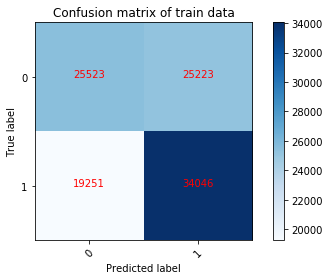

Confusion matrix, without normalization
[[10495 11137]
 [ 8566 14393]]


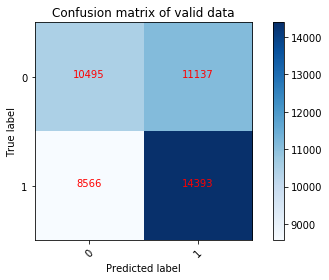

[[32437 18309]
 [15322 37975]] 

[[11002 10630]
 [ 9208 13751]] 

Confusion matrix, without normalization
[[32437 18309]
 [15322 37975]]


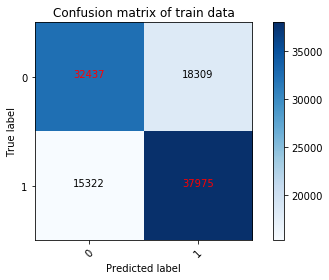

Confusion matrix, without normalization
[[11002 10630]
 [ 9208 13751]]


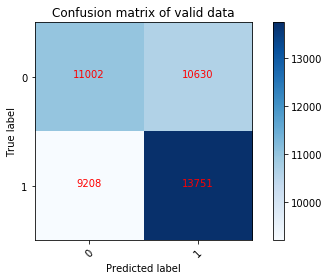

[[25807 24939]
 [19390 33907]] 

[[10528 11104]
 [ 8690 14269]] 

Confusion matrix, without normalization
[[25807 24939]
 [19390 33907]]


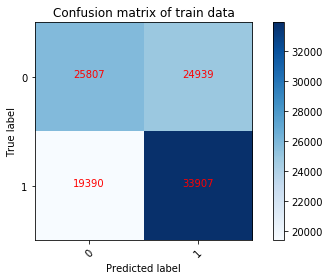

Confusion matrix, without normalization
[[10528 11104]
 [ 8690 14269]]


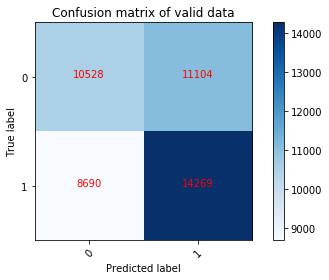

In [59]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.4f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

#visualization of confusion matrix
def confm(m, train, valid): 
    return (confusion_matrix(y_train,m.predict(train)),
                            confusion_matrix(y_valid,m.predict(valid)))


for modelname in [model_xgb,model_cb,model_lgb]:
    ctrain,cvalid = confm(modelname,X_train,X_valid)
    print(ctrain,'\n')
    print(cvalid,'\n')
    plot_confusion_matrix(ctrain,classes = [0,1],title='Confusion matrix'+' of train data')
    plot_confusion_matrix(cvalid,classes = [0,1],title='Confusion matrix'+' of valid data')

In [71]:
print(25523+19251+25223+34046)
print(10495+8566+11137+14393)

104043
44591


In [74]:
def acc(m, train, valid): 
    return (metrics.accuracy_score(y_valid,m.predict(valid)))#metrics.accuracy_score(y_train,m.predict(train)),
for modelname in [model_xgb,model_cb,model_lgb]:
    cvalid = acc(modelname,X_train,X_valid)#ctrain,
    #print(ctrain,'\n')
    print(cvalid,'\n')

0.5581395348837209 

0.5551120181202485 

0.5560987643246394 



In [68]:
#Precision&Recall
import numpy as np
from sklearn.metrics import classification_report

def classirepo(m, train, valid):
    target_names = ['class0','class1']
    return (classification_report(y_valid,m.predict(valid),target_names = target_names,digits=4))#classification_report(y_train,m.predict(train),target_names = target_names,digits=4),

for modelname in [model_xgb,model_cb,model_lgb]:
    cvalid = classirepo(modelname,X_train,X_valid)#ctrain,
    #print(ctrain,'\n')
    print(cvalid,'\n')


              precision    recall  f1-score   support

      class0     0.5506    0.4852    0.5158     21632
      class1     0.5638    0.6269    0.5937     22959

   micro avg     0.5581    0.5581    0.5581     44591
   macro avg     0.5572    0.5560    0.5547     44591
weighted avg     0.5574    0.5581    0.5559     44591
 

              precision    recall  f1-score   support

      class0     0.5444    0.5086    0.5259     21632
      class1     0.5640    0.5989    0.5809     22959

   micro avg     0.5551    0.5551    0.5551     44591
   macro avg     0.5542    0.5538    0.5534     44591
weighted avg     0.5545    0.5551    0.5542     44591
 

              precision    recall  f1-score   support

      class0     0.5478    0.4867    0.5154     21632
      class1     0.5624    0.6215    0.5905     22959

   micro avg     0.5561    0.5561    0.5561     44591
   macro avg     0.5551    0.5541    0.5530     44591
weighted avg     0.5553    0.5561    0.5541     44591
 



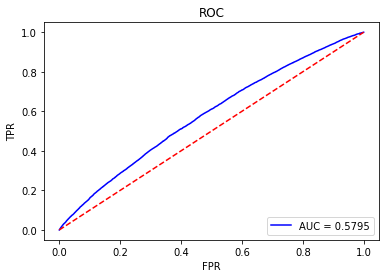

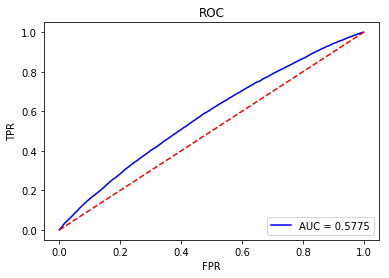

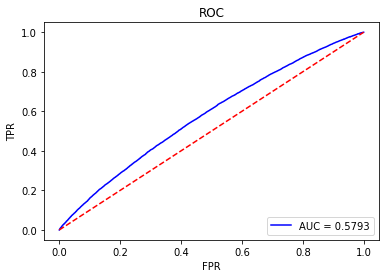

In [65]:
from sklearn.metrics import roc_curve, auc
import matplotlib as mpl  
import matplotlib.pyplot as plt

def plot_roc(labels, predict_prob):
    false_positive_rate,true_positive_rate,thresholds=roc_curve(labels, predict_prob,pos_label=0)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    plt.title('ROC')
    plt.plot(false_positive_rate, true_positive_rate,'b',label='AUC = %0.4f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.show()
    #print('thresholds:\n',thresholds)
    

for modelname in [model_xgb,model_cb,model_lgb]:
    #prob=pd.DataFrame(modelname.predict_proba(X_train))
    #print(prob[0])
    #plot_roc(modelname.predict(X_train),prob[0])
    prob=pd.DataFrame(modelname.predict_proba(X_valid))
    plot_roc(y_valid,prob[0])
